In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
while 'notebooks' in os.getcwd():
    os.chdir('..')

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
n_cliques = 4
nodes_per_clique = 8
rewiring = 0.23
seed = 0

graph_hom = nx.relaxed_caveman_graph(
    n_cliques,
    nodes_per_clique,
    rewiring,
    seed=seed)

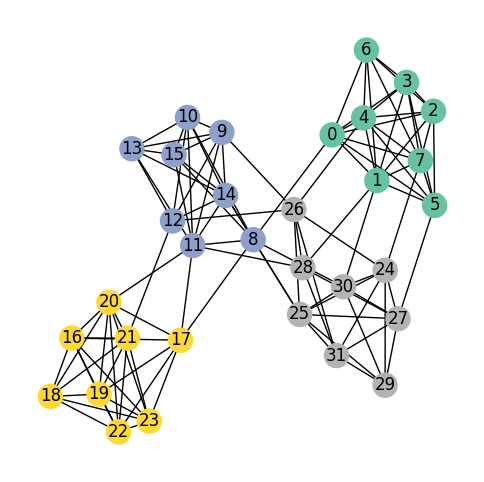

In [15]:
pos_hom = nx.kamada_kawai_layout(graph_hom)

node_classes_hom = [x // nodes_per_clique for x in graph_hom.nodes()]
class_dict = dict(zip(graph_hom.nodes(), node_classes_hom))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

nx.draw_networkx(
    graph_hom,
    pos=pos_hom,
    with_labels=True,
    node_color=node_classes_hom,
    cmap='Set2',
    ax=ax)

ax.set_axis_off()

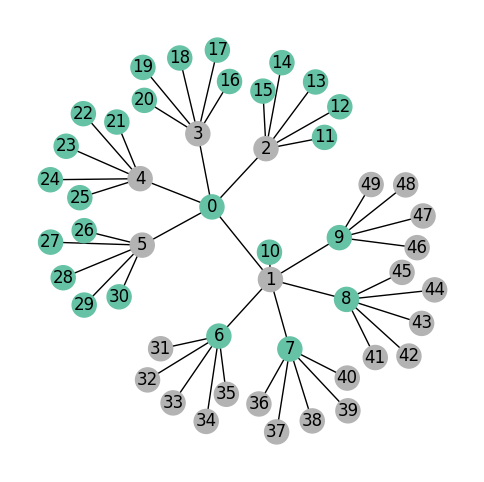

In [30]:
r = 5
n = 50

seed = 0

graph_het = nx.full_rary_tree(
    r,
    n)

distances = nx.shortest_path_length(graph_het, source=0)
node_classes_het = [distances[x] % 2 for x in graph_het.nodes()]

pos_het = nx.kamada_kawai_layout(graph_het)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

nx.draw_networkx(
    graph_het,
    pos=pos_het,
    with_labels=True,
    node_color=node_classes_het,
    cmap='Set2',
    ax=ax)

ax.set_axis_off()


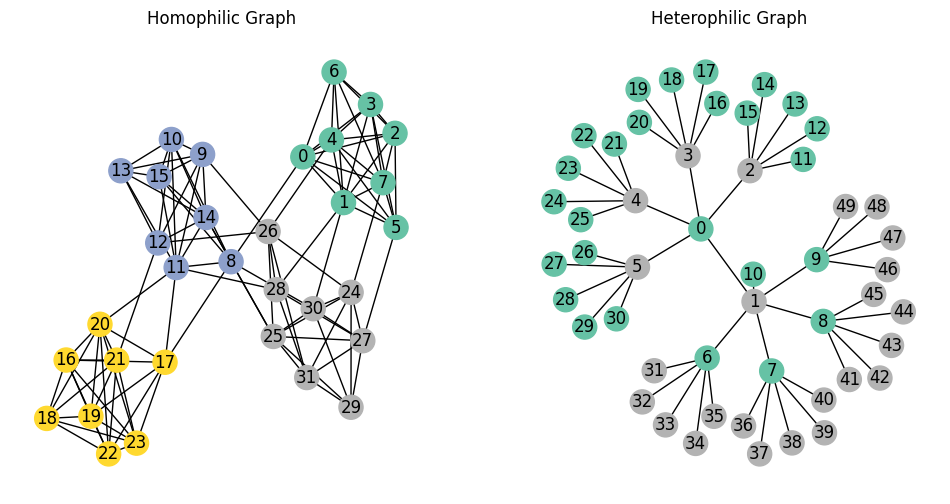

In [34]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

nx.draw_networkx(
    graph_hom,
    pos=pos_hom,
    with_labels=True,
    node_color=node_classes_hom,
    cmap='Set2',
    ax=ax0)

ax0.set_axis_off()

ax0.set_title('Homophilic Graph')


nx.draw_networkx(
    graph_het,
    pos=pos_het,
    with_labels=True,
    node_color=node_classes_het,
    cmap='Set2',
    ax=ax1)

ax1.set_axis_off()
ax1.set_title('Heterophilic Graph')

plt.savefig('reports/images/homophilic_vs_heterophilic_example.pdf')